In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [53]:
class HierarchicalClustering:
    def __init__(self, data):
        self.data = data

    def setGene(self, data):
        self.gene_data = data

    def preprocess_data(self):
        self.data = pd.get_dummies(self.data, columns=['Genre'])
        numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
        self.data[numerical_cols] = (self.data[numerical_cols] - self.data[numerical_cols].mean()) / self.data[numerical_cols].std()
    
    def calculate_linkage_matrix(self, linkage_type='ward', features=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
        X = self.data.drop(columns=['CustomerID'])
        linkage_matrix = linkage(X, method=linkage_type, metric='euclidean')
        return linkage_matrix
    
    def calc_link_matrix_gene(self, linkage_type= 'ward', features = None):
        # X = self.gene_data.drop(columns=['ID_REF'])
        # print(self.gene_data)
        linkage_matrix = linkage(self.gene_data, method=linkage_type, metric='euclidean')
        return linkage_matrix
    
    def plot_dendrogram(self, linkage_matrix):
        plt.figure(figsize=(32, 9))
        dendrogram(linkage_matrix)
        plt.title('Dendrogram')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()

In [45]:
csv_file_path = 'SMAI-Dataset-hc-dataset/new_customers.csv'
data = pd.read_csv(csv_file_path)
print(data.shape)

(200, 5)


(199, 4)


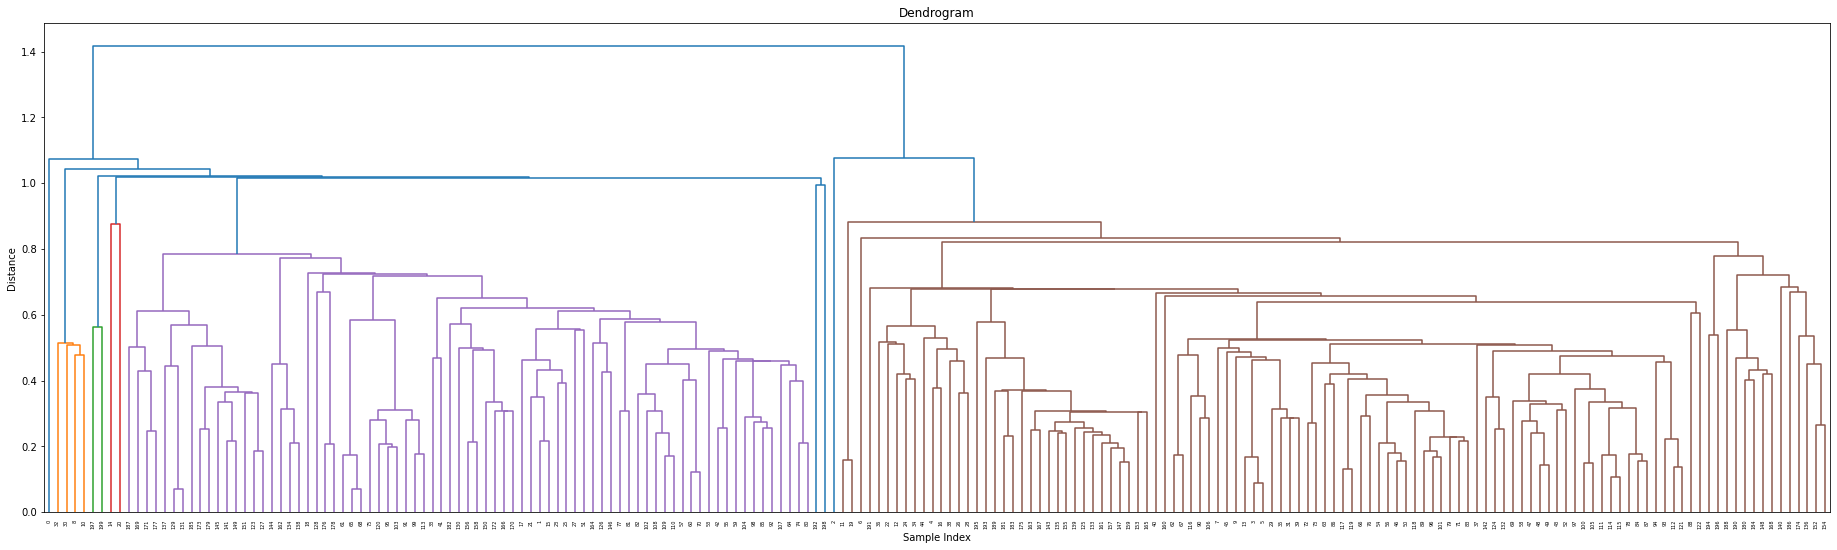

(199, 4)


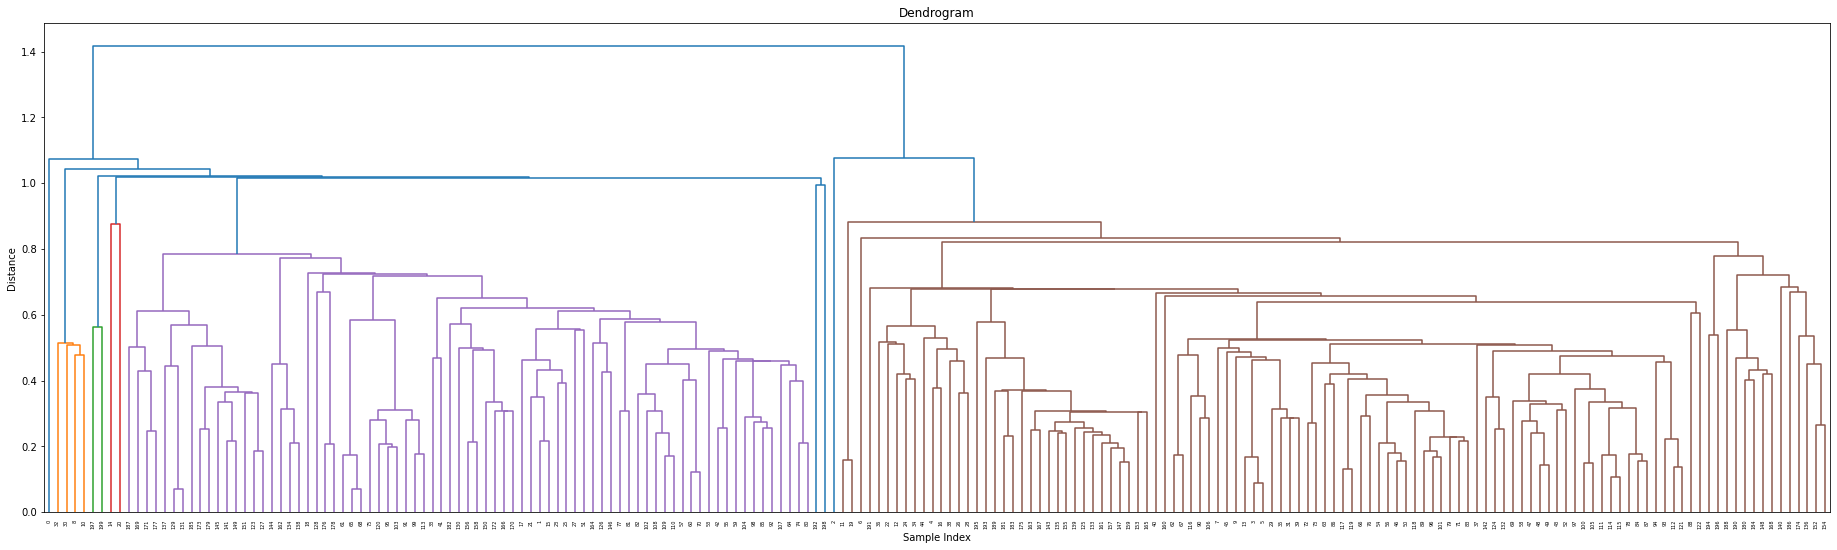

(199, 4)


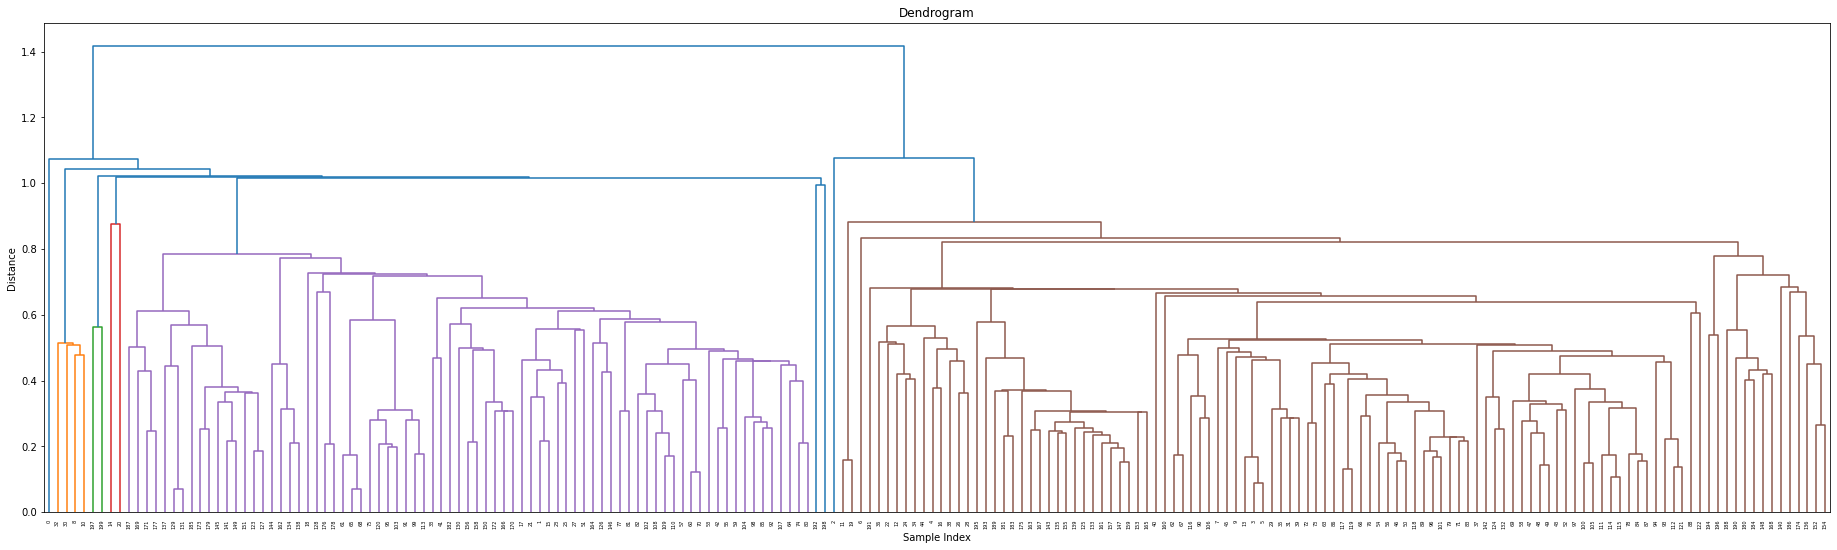

(199, 4)


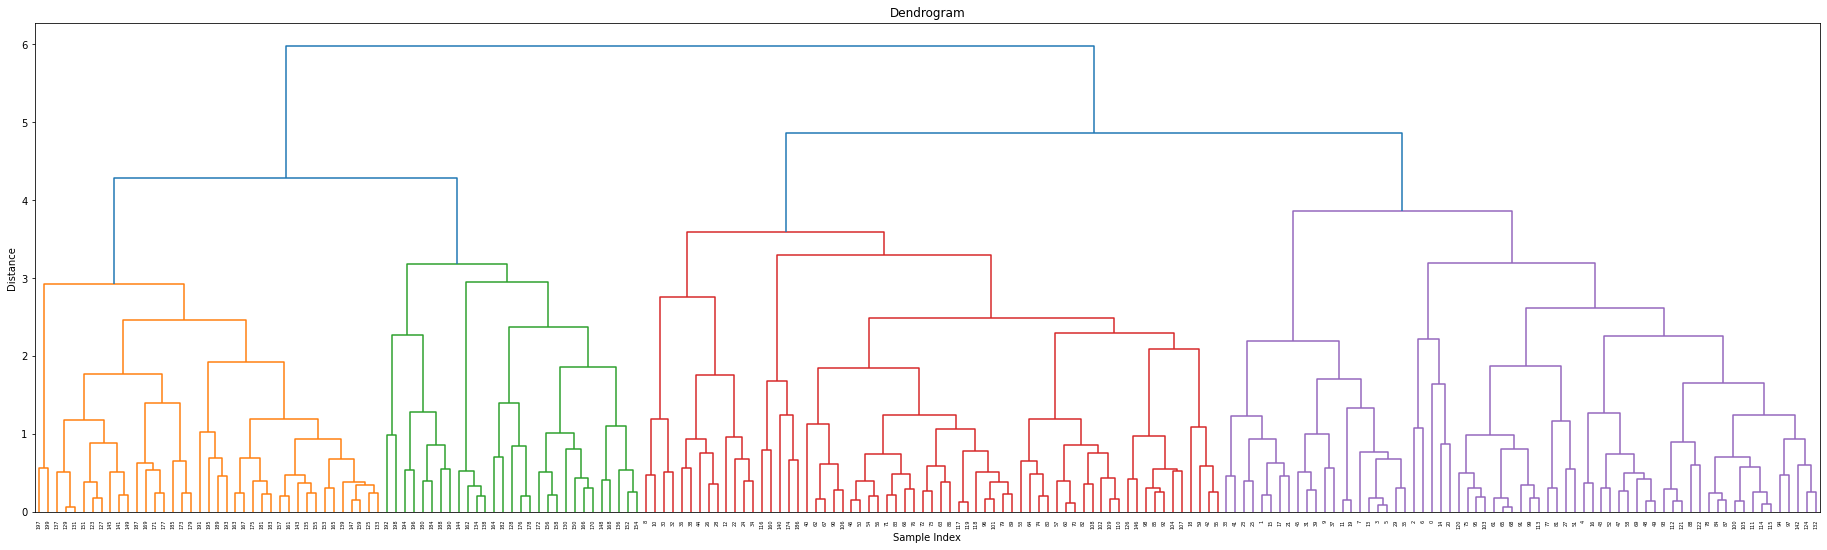

(199, 4)


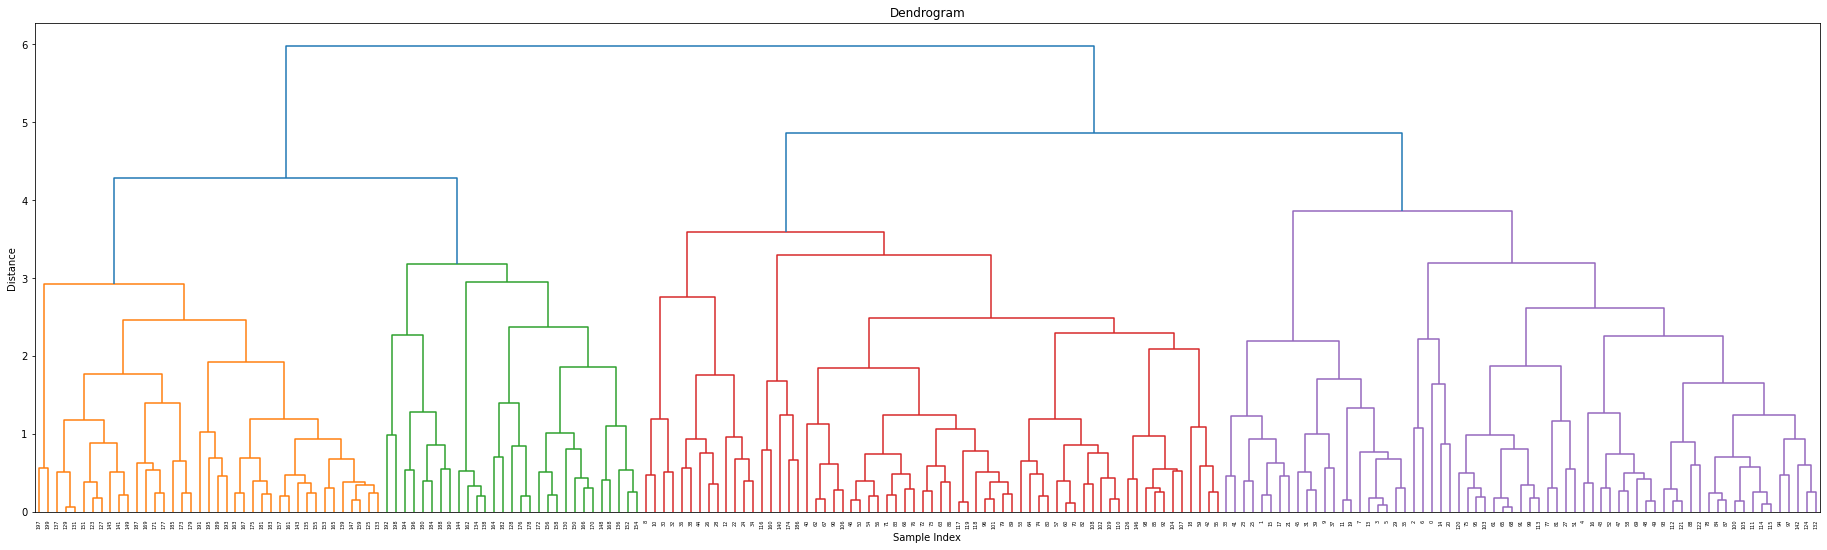

(199, 4)


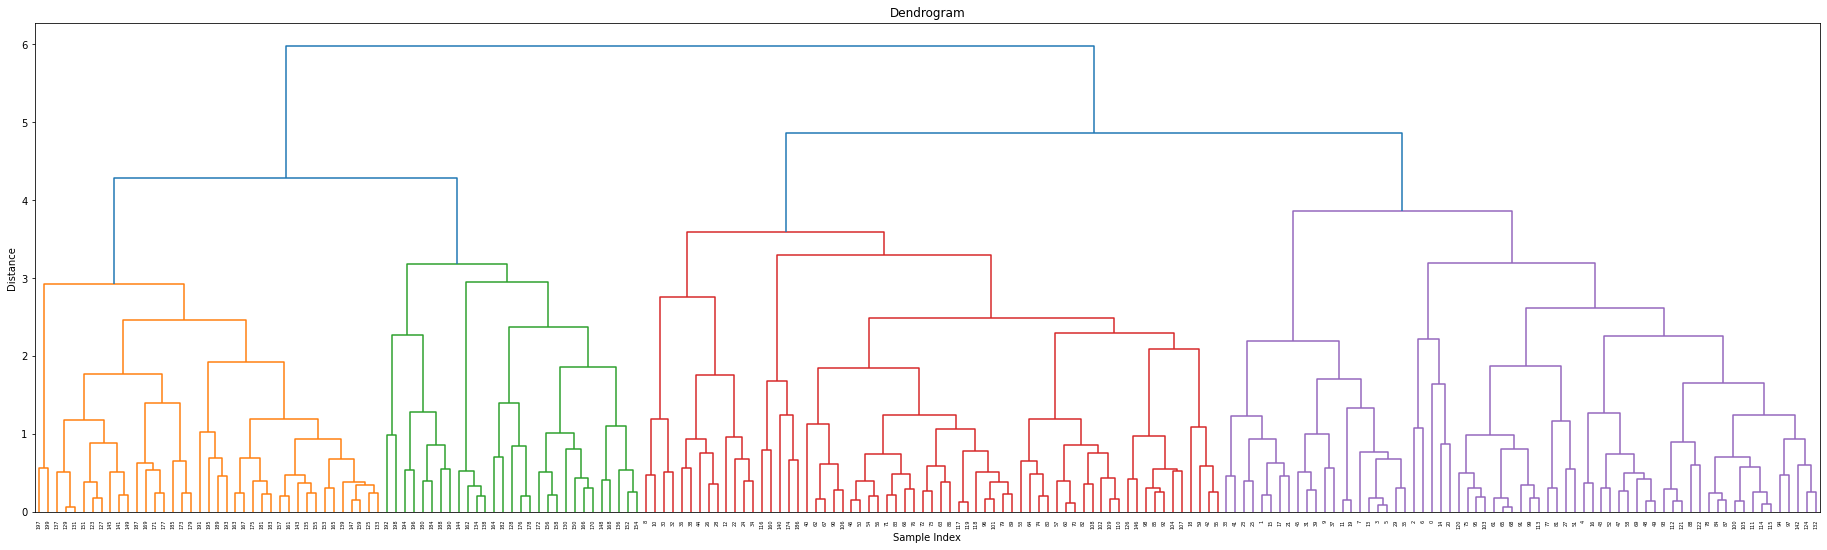

(199, 4)


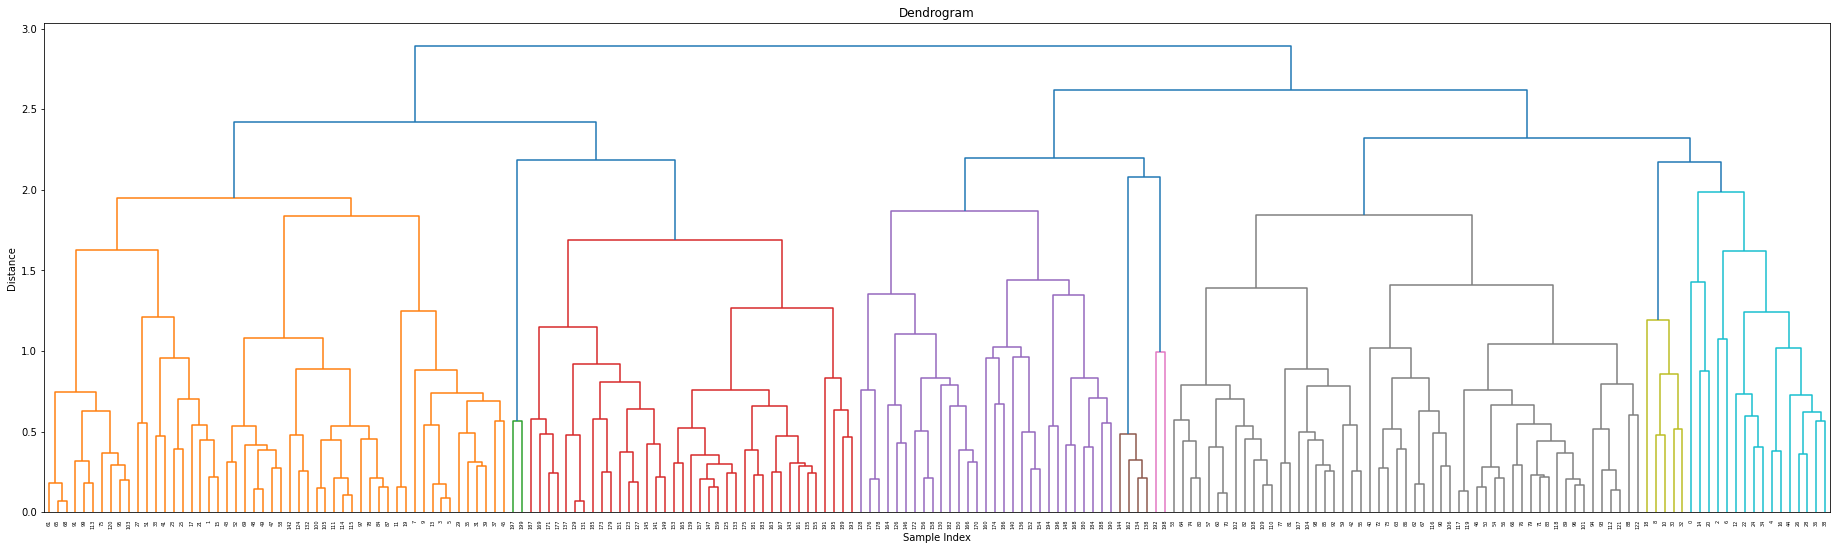

(199, 4)


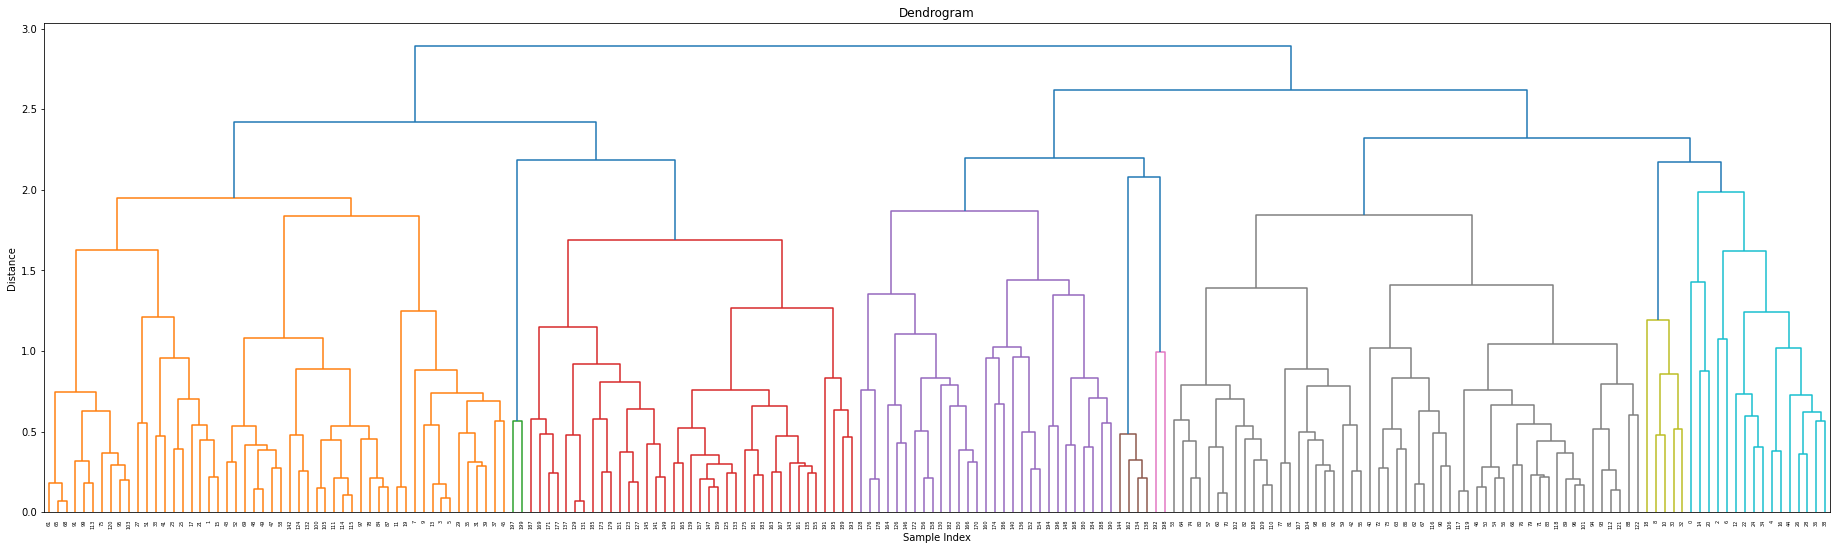

(199, 4)


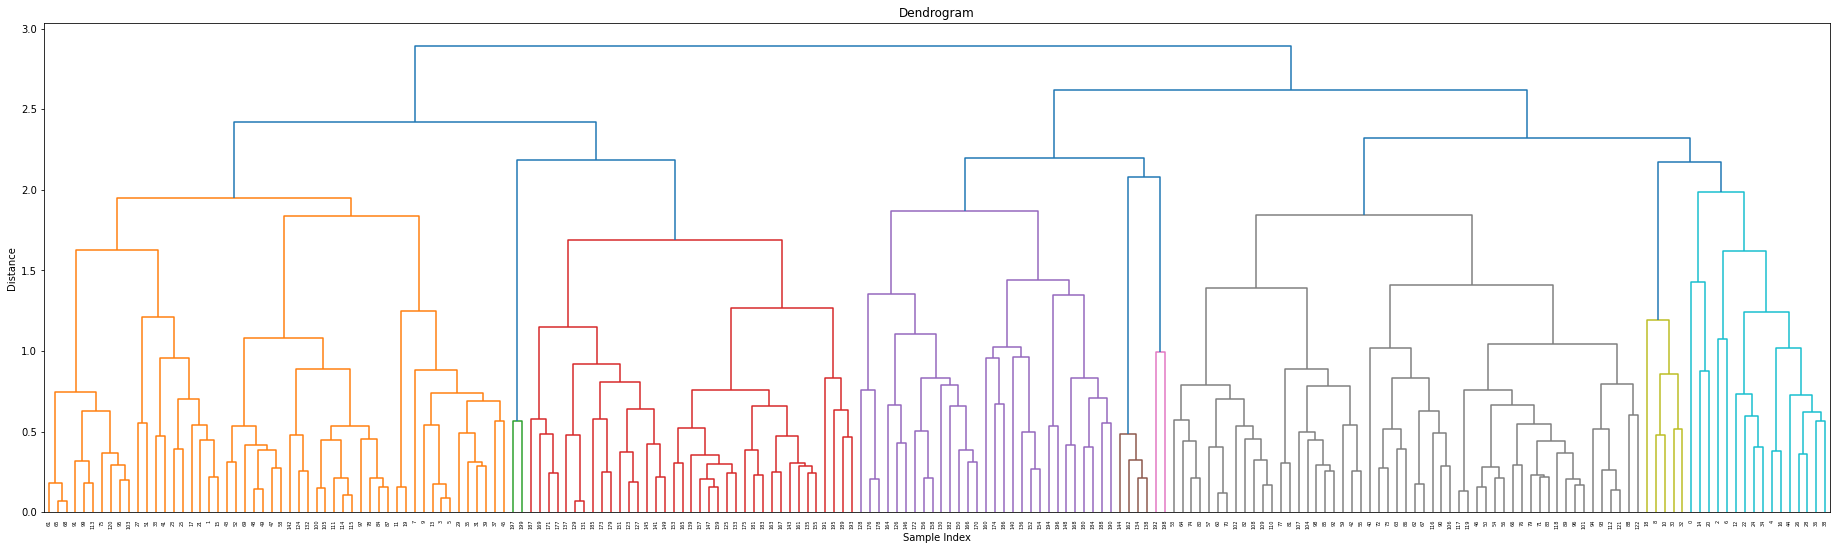

(199, 4)


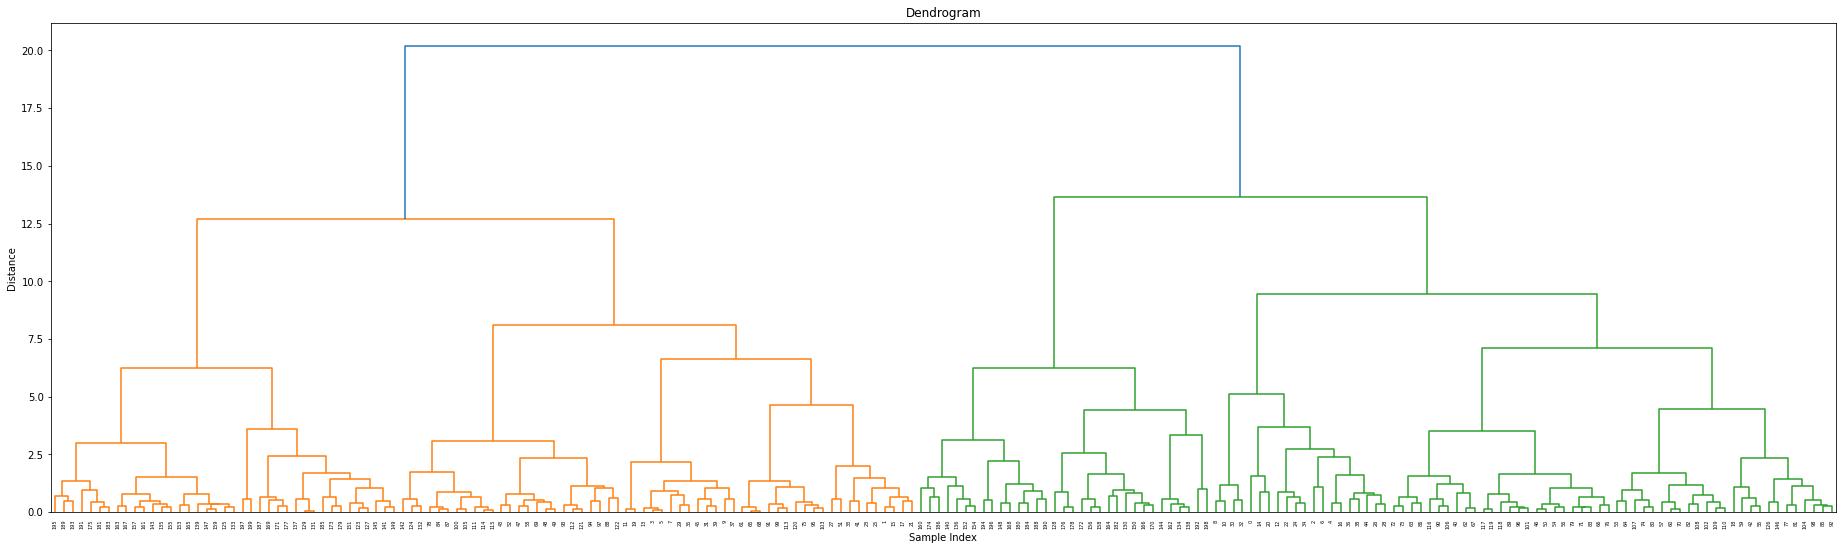

(199, 4)


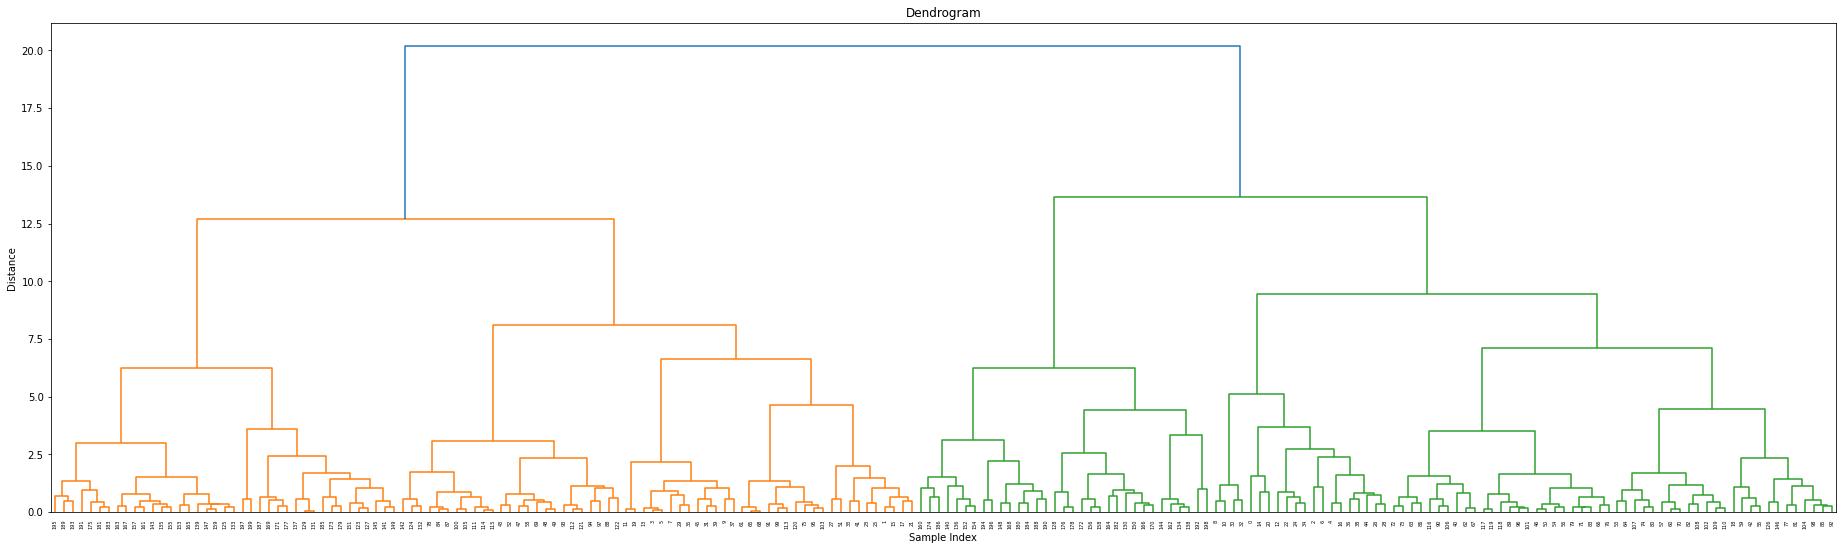

(199, 4)


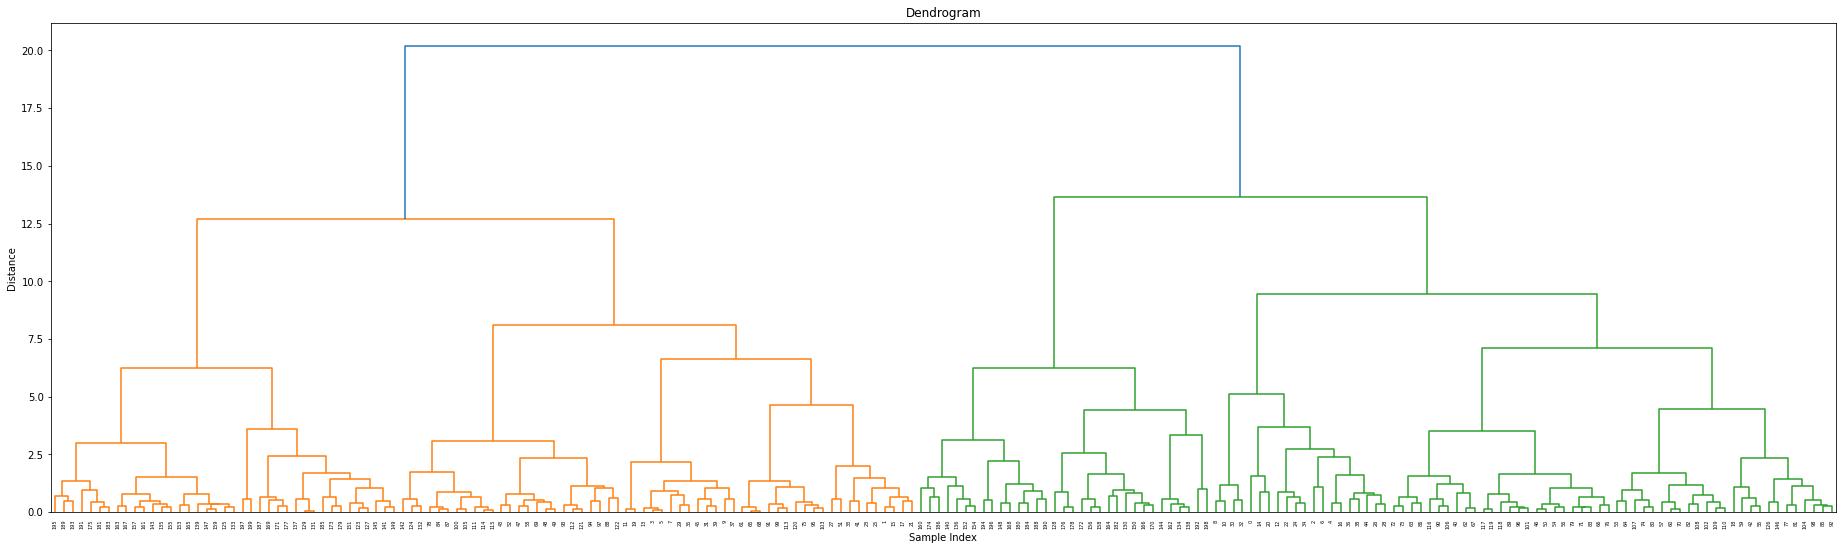

In [46]:
hc = HierarchicalClustering(data)
hc.preprocess_data()

linkage_types = ['single', 'complete', 'average', 'ward']
feature_combinations = [['Age', 'Annual Income (k$)'], ['Annual Income (k$)', 'Spending Score (1-100)'], ['Age', 'Spending Score (1-100)']]

for linkage_type in linkage_types:
    for feature in feature_combinations:
        linkage_matrix = hc.calculate_linkage_matrix(linkage_type, feature)
        print(linkage_matrix.shape)
        hc.plot_dendrogram(linkage_matrix)

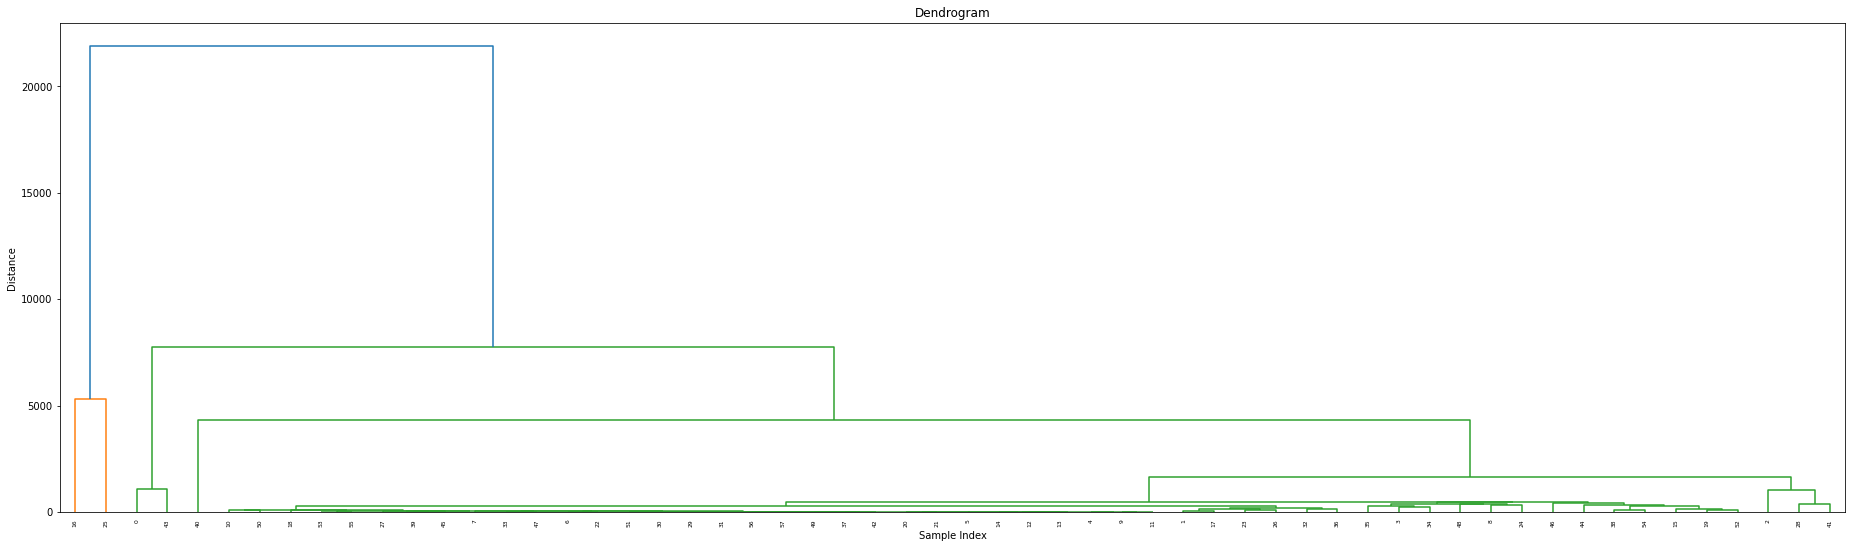

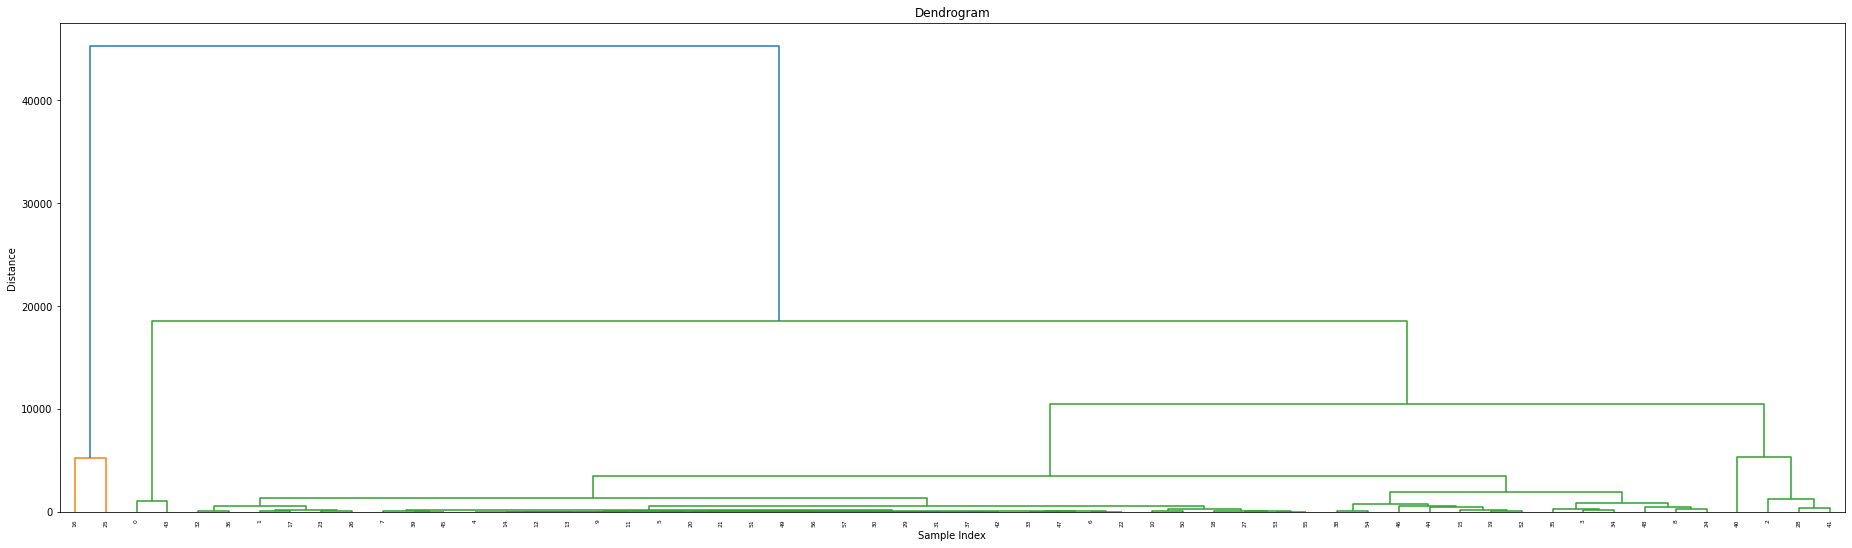

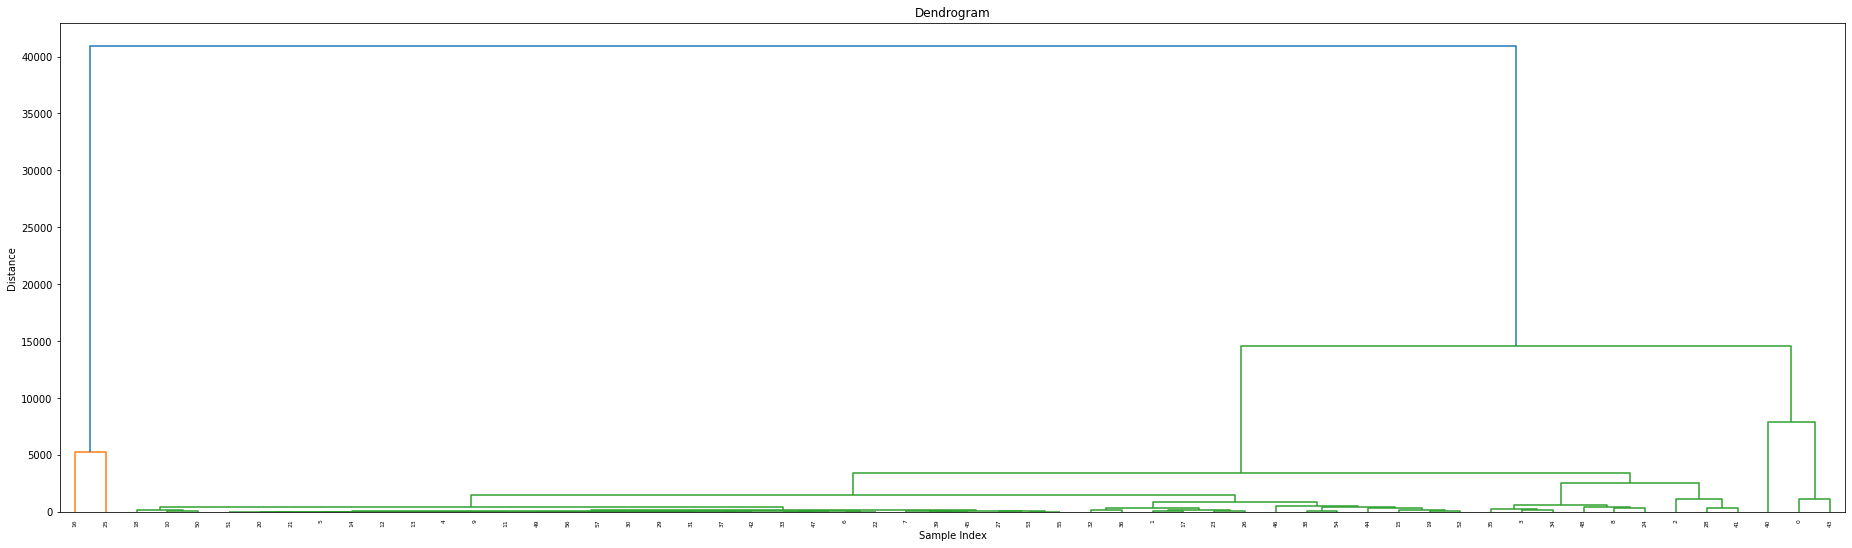

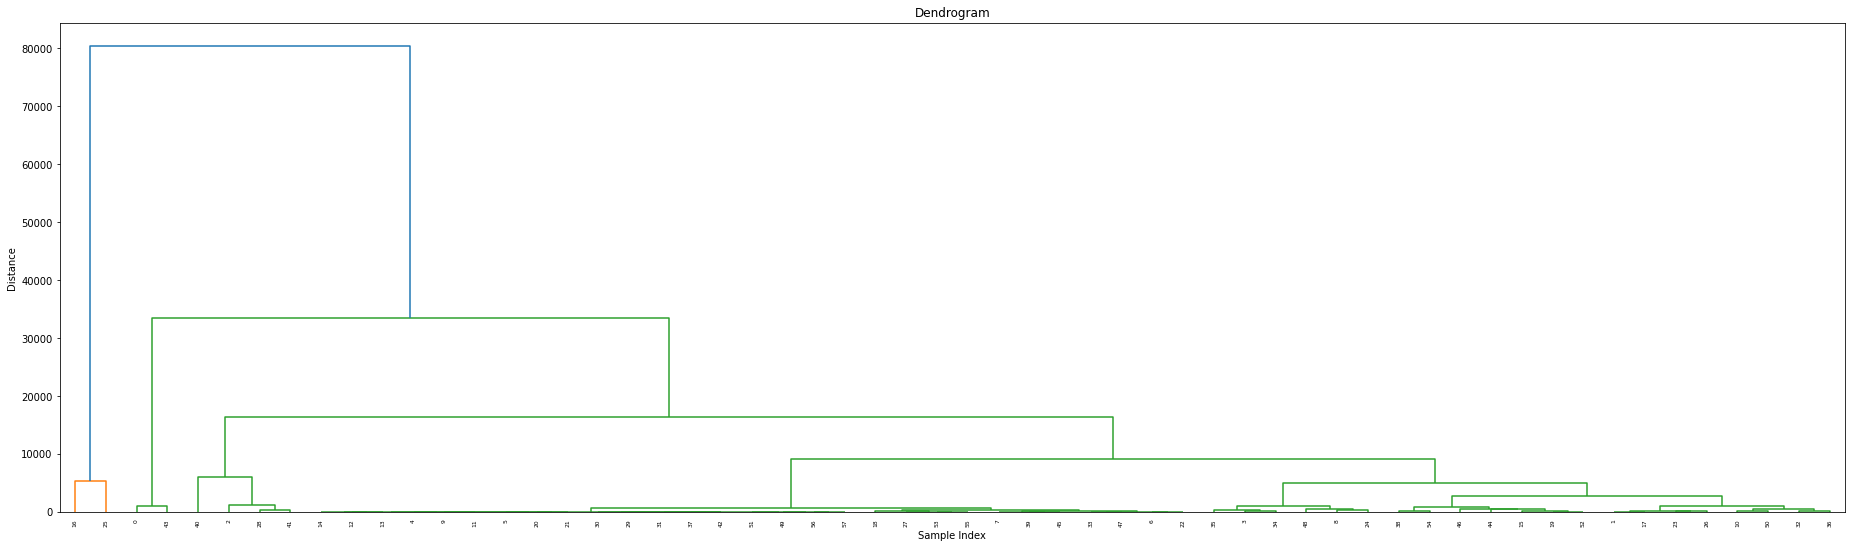

In [54]:
gene_csv_file_path = 'SMAI-Dataset-gene-expression/gene.csv'
gene_data = pd.read_csv(gene_csv_file_path)
hc = HierarchicalClustering(gene_data)
hc.setGene(gene_data)

linkage_types = ['single', 'complete', 'average', 'ward']

for linkage_type in linkage_types:
    linkage_matrix = hc.calc_link_matrix_gene(linkage_type, features=list(gene_data.columns)[1:])
    hc.plot_dendrogram(linkage_matrix)

### Observations: 
The generated cluster structures are influenced by the linkage method selection.
Single linkage may cause chaining and increased sensitivity to outliers, although it is appropriate for locating elongated or non-globular clusters.
Complete linkage creates compact, well-separated clusters but may overlook smaller ones.
Average linkage offers a balanced strategy and is adaptable to different cluster sizes and configurations.
We observe that the type of linkage used should be compatible with the features of the data and clustering objectives.

1. Single Linkage: Single linkage is based on the minimum pairwise distance between points in different clusters. It can be sensitive to outliers and noise in the data because a single outlier can create a long chain of points connected by small distances. However, single linkage can be appropriate when you are dealing with elongated or non-globular clusters, as it tends to produce chain-like structures. For example, in a river network, single linkage could be useful for identifying connected segments.

2. Complete Linkage: Complete linkage, on the other hand, focuses on the maximum pairwise distance between points in different clusters. It tends to create compact, spherical, and well-separated clusters. This approach can be less sensitive to outliers compared to single linkage. However, it may overlook smaller clusters within larger ones, as it favors creating clusters that are more homogeneous. In applications like astronomy, complete linkage can be suitable for identifying distinct galaxies within a larger galaxy cluster.

3. Average Linkage: Average linkage computes the average pairwise distance between all points in different clusters. It provides a balanced strategy, making it adaptable to different cluster sizes and configurations. Average linkage can be a good compromise between single and complete linkage. It is less sensitive to outliers than single linkage but doesn't produce as compact clusters as complete linkage. In many real-world scenarios, where data may contain a mix of cluster shapes and sizes, average linkage can be a suitable choice.